In [1]:
%load_ext autoreload
%autoreload 1

import src_loader

import torch
import torch.nn as nn
from torch.nn import functional
import torchvision
import numpy as np

from models import ResNetSimple6 as ResNet 
import innvestigator
from innvestigator import InnvestigateModel
import pandas as pd
from torchvision import transforms, utils
from PIL import Image
import os
import numpy as np

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

model = ResNet(5, (256, 1))
model.load_state_dict(torch.load("../trained/reduced-rcrop_rrotation-2020-07-11_16-15-26-res6.pt", map_location=device))
model.eval()
print(model)

Running on the GPU
15
1028
ResNetSimple6(
  (relu): ReLU()
  (conv1_1): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1))
  (conv1_2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batch1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (resBlock1_1): ResBlock(
    (relu): ReLU()
    (conv_in): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batch1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop1): Dropout(p=0.25, inplace=False)
    (conv_out): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batch2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1))
  (batch2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (resBlock2_1): ResBlock(
  

In [4]:
%aimport innvestigator
%aimport inverter_util
inn_model = InnvestigateModel(model, lrp_exponent=2, method="e-rule", beta=.5)

In [5]:
%aimport inverter_util
test = torch.rand((1,1,256,256))
#print(model(test))

model_prediction, heatmap = inn_model.innvestigate(in_tensor=test)

In [6]:
labels = pd.concat([pd.read_csv("../Data/reduced/CheXpert-v1.0/train-9000-reduced.csv"),
                   pd.read_csv("../Data/reduced/CheXpert-v1.0/valid-1000-reduced.csv")], ignore_index=True)

paths = labels['Path']
paths = paths.apply(lambda p: os.path.join('../Data/reduced', p))

transform =  transforms.Compose([transforms.Resize(256, Image.LANCZOS),
                            transforms.CenterCrop(256), transforms.Grayscale(),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.5584914588061902], std=[0.2683745711250149])])

PATHOLOGIES = np.array(['No Finding', 'Lung Opacity', 'Atelectasis', 'Pleural Effusion', 'Support Devices'])

def get_prediction(model_output):
    return model_output > 0.5

tensor([False, False, False, False,  True])
[ True False False False  True]
Progress: 0.01%
Pathologies: ['Support Devices']
Ground Truth: ['No Finding' 'Support Devices']
Heatmap: torch.Size([1, 1, 256, 256])


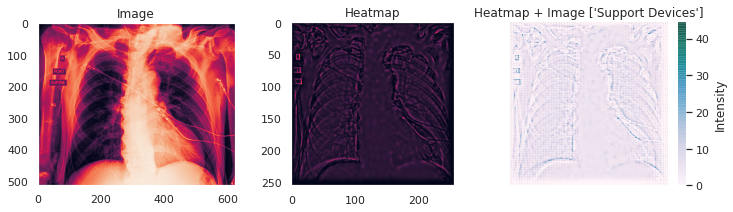

tensor([False, False, False, False,  True])
[ True False False False False]
Progress: 0.02%
Pathologies: ['Support Devices']
Ground Truth: ['No Finding']
Heatmap: torch.Size([1, 1, 256, 256])


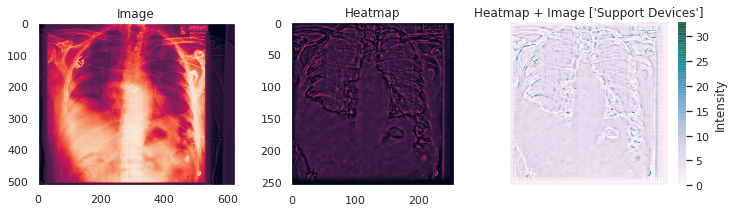

tensor([False, False, False, False, False])
[ True False False False False]
Progress: 0.03%
Pathologies: []
Ground Truth: ['No Finding']
Heatmap: torch.Size([1, 1, 256, 256])


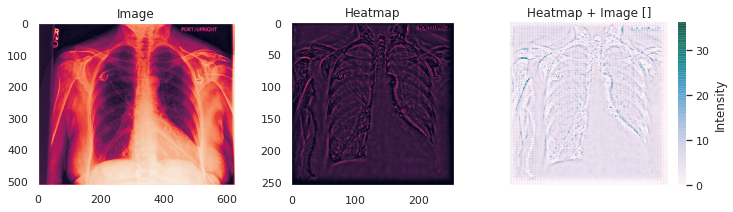

tensor([False, False, False, False, False])
[ True False False False False]
Progress: 0.04%
Pathologies: []
Ground Truth: ['No Finding']
Heatmap: torch.Size([1, 1, 256, 256])


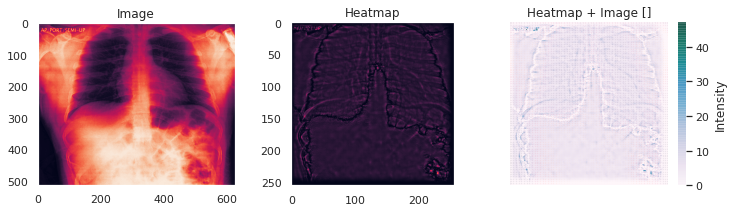

tensor([False, False, False, False,  True])
[ True False False False False]
Progress: 0.05%
Pathologies: ['Support Devices']
Ground Truth: ['No Finding']
Heatmap: torch.Size([1, 1, 256, 256])


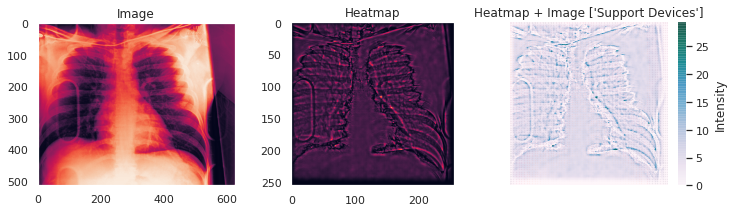

tensor([False, False, False, False, False])
[ True False False False False]
Progress: 0.06%
Pathologies: []
Ground Truth: ['No Finding']
Heatmap: torch.Size([1, 1, 256, 256])


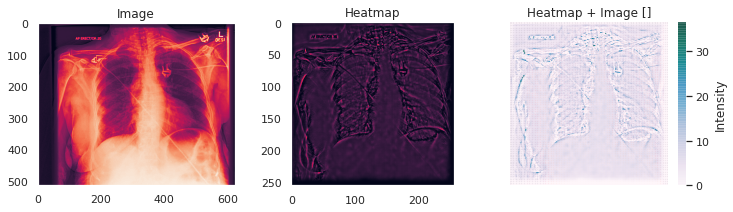

tensor([False, False, False, False,  True])
[ True False False False  True]
Progress: 0.07%
Pathologies: ['Support Devices']
Ground Truth: ['No Finding' 'Support Devices']
Heatmap: torch.Size([1, 1, 256, 256])


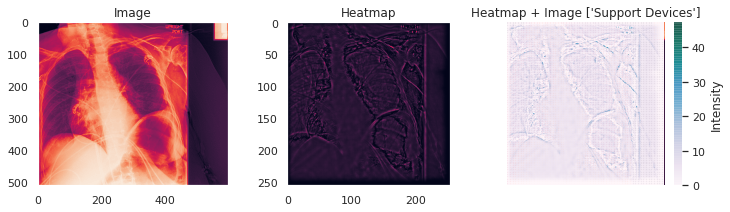

tensor([False, False,  True, False,  True])
[ True False False False  True]
Progress: 0.08%
Pathologies: ['Atelectasis' 'Support Devices']
Ground Truth: ['No Finding' 'Support Devices']
Heatmap: torch.Size([1, 1, 256, 256])


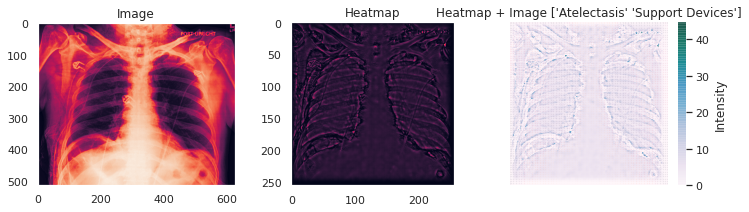

tensor([ True, False, False, False,  True])
[ True False False False  True]
Progress: 0.09%
Pathologies: ['No Finding' 'Support Devices']
Ground Truth: ['No Finding' 'Support Devices']
Heatmap: torch.Size([1, 1, 256, 256])


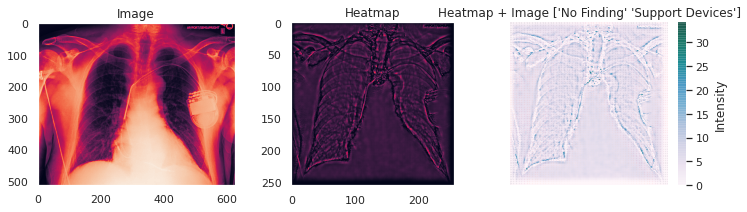

tensor([False, False, False, False, False])
[ True False False False False]
Progress: 0.1%
Pathologies: []
Ground Truth: ['No Finding']
Heatmap: torch.Size([1, 1, 256, 256])


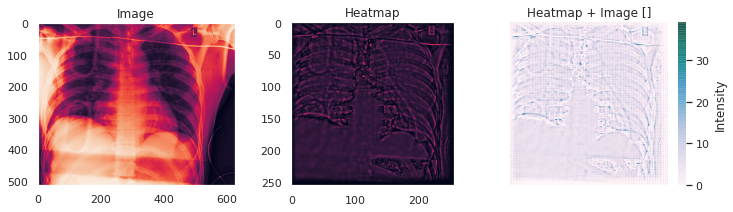

tensor([False, False, False, False,  True])
[ True False False False  True]
Progress: 0.11%
Pathologies: ['Support Devices']
Ground Truth: ['No Finding' 'Support Devices']
Heatmap: torch.Size([1, 1, 256, 256])


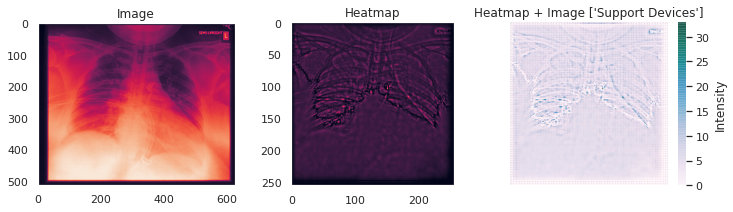

tensor([False, False, False, False,  True])
[ True False False False  True]
Progress: 0.12%
Pathologies: ['Support Devices']
Ground Truth: ['No Finding' 'Support Devices']
Heatmap: torch.Size([1, 1, 256, 256])


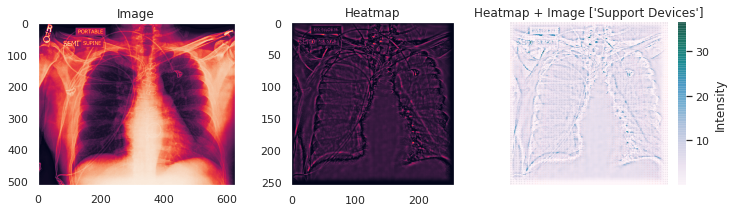

tensor([ True, False, False, False,  True])
[ True False False False  True]
Progress: 0.13%
Pathologies: ['No Finding' 'Support Devices']
Ground Truth: ['No Finding' 'Support Devices']
Heatmap: torch.Size([1, 1, 256, 256])


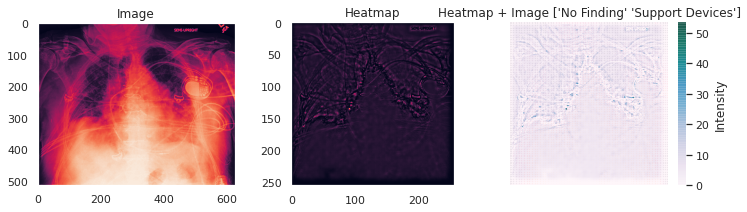

tensor([False, False, False, False,  True])
[ True False False False False]
Progress: 0.14%
Pathologies: ['Support Devices']
Ground Truth: ['No Finding']
Heatmap: torch.Size([1, 1, 256, 256])


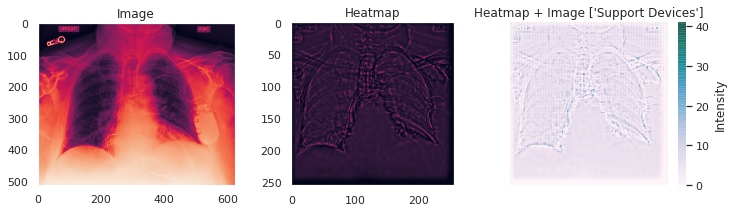

tensor([False, False, False, False,  True])
[ True False False False  True]
Progress: 0.15%
Pathologies: ['Support Devices']
Ground Truth: ['No Finding' 'Support Devices']
Heatmap: torch.Size([1, 1, 256, 256])


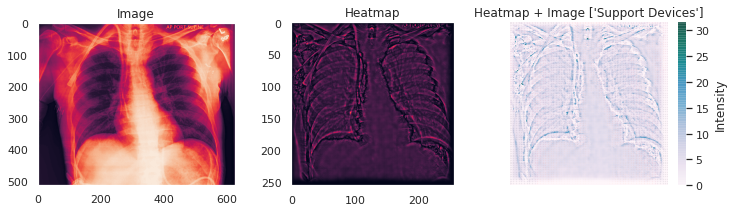

tensor([False, False, False, False,  True])
[ True False False False False]
Progress: 0.16%
Pathologies: ['Support Devices']
Ground Truth: ['No Finding']
Heatmap: torch.Size([1, 1, 256, 256])


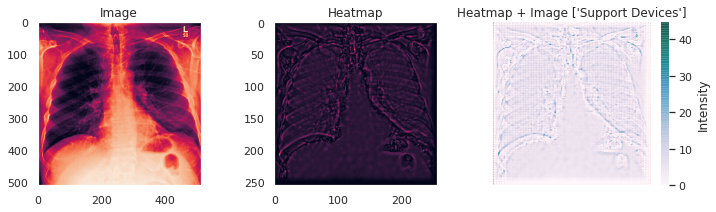

tensor([False, False, False, False, False])
[ True False False False False]
Progress: 0.17%
Pathologies: []
Ground Truth: ['No Finding']
Heatmap: torch.Size([1, 1, 256, 256])


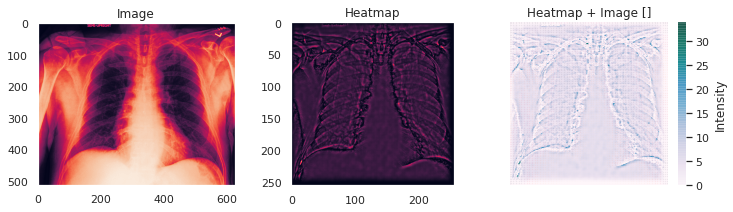

tensor([False,  True,  True, False, False])
[ True False False False  True]
Progress: 0.18%
Pathologies: ['Lung Opacity' 'Atelectasis']
Ground Truth: ['No Finding' 'Support Devices']
Heatmap: torch.Size([1, 1, 256, 256])


KeyboardInterrupt: 

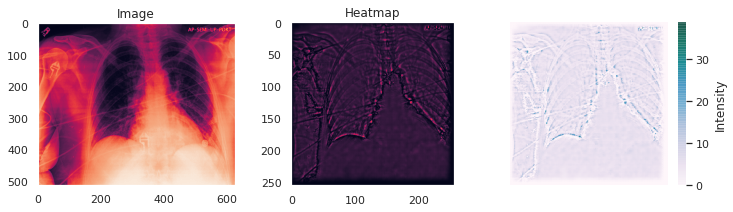

In [7]:
from heatmapper import visualize

N = len(paths)
for i, path in enumerate(paths, start=1):
    
    img = Image.open(path)
    img_tensor = transform(img).unsqueeze(0)
    
    _, heatmap = inn_model.innvestigate(in_tensor = img_tensor)
    
    prediction = get_prediction(inn_model.prediction.flatten())
    l = labels.iloc[i-1][PATHOLOGIES.tolist()].values.astype(bool)
    print(prediction)
    print(l)
    
    print(f"Progress: {(i*100)/N}%")
    print(f"Pathologies: {PATHOLOGIES[prediction.numpy().flatten()]}")
    print(f"Ground Truth: {PATHOLOGIES[np.array(l)]}")
    print(f"Heatmap: {heatmap.shape}")
    heatmap_data = heatmap.numpy()[0][0]
    visualize(img, heatmap_data, explanation=PATHOLOGIES[prediction.numpy().flatten()])